# Data Scientist Associate Practical Exam

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [1]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here...
### I will be importing all necessary packages in this cell, and setting the random seed here in case I use np.random
import numpy as np
import pandas as pd
np.random.seed(271828)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay

In [2]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [3]:
moped = pd.read_csv("data/moped.csv")
display(moped.head())
display("Shape of dataframe: {}".format(moped.shape))
# counting the null entries in each column and data types of each column
display("Datatypes:", moped.dtypes)
display("Null count:", moped.isnull().sum())
# check each column for unexpected values
for col in moped.columns:
    display(moped[col].value_counts())

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


'Shape of dataframe: (713, 9)'

'Datatypes:'

Used it for          object
Owned for            object
Model Name           object
Visual Appeal       float64
Reliability         float64
Extra Features      float64
Comfort             float64
Maintenance cost    float64
Value for Money     float64
dtype: object

'Null count:'

Used it for           0
Owned for             0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
dtype: int64

Commuting    553
Leisure      160
Name: Used it for, dtype: int64

> 6 months     290
<= 6 months    288
Never owned    135
Name: Owned for, dtype: int64

Hero Electric Flash        94
Hero Electric Optima       75
Okinawa Praise             73
Revolt RV 400              44
PURE EV EPluto 7G          40
Hero Electric Photon       34
Tork Kratos                33
Ather 450X                 26
OLA S1 Pro                 25
Ampere Magnus EX           25
Ampere REO                 21
Benling Aura               19
OLA S1                     18
TVS iQube                  17
Ampere Magnus Pro          16
PURE EV ETrance Neo        16
Bajaj Chetak               13
Okinawa Ridge Plus         12
Okinawa i-Praise           11
Bounce Infinity E1         10
Hero Electric Optima CX     9
Ampere Zeal                 9
Techo Electra Raptor        8
Hero Electric NYX           8
Techo Electra Emerge        7
Revolt RV 300               6
Okinawa Lite                6
Okinawa R30                 6
Yo Drift                    5
Joy e-bike Wolf             5
Gemopai Ryder               5
Hero Electric Atria         3
Gemopai Astrid Lite         3
e-bike Gen

5.0    287
4.0    192
3.0    106
1.0     90
2.0     38
Name: Visual Appeal, dtype: int64

5.0    236
1.0    176
4.0    157
3.0     91
2.0     53
Name: Reliability, dtype: int64

1.0    60
5.0    47
4.0    37
2.0    24
3.0    15
Name: Extra Features, dtype: int64

5.0    184
4.0    150
1.0     74
3.0     64
2.0     38
Name: Comfort, dtype: int64

4.0    75
5.0    37
1.0    31
2.0    18
3.0    15
Name: Maintenance cost, dtype: int64

4.0    118
5.0    107
1.0     85
3.0     35
2.0     25
Name: Value for Money, dtype: int64

In [4]:
# Changing null values in rated cols to 0
moped.loc[:,"Visual Appeal":"Value for Money"] = moped.loc[:,"Visual Appeal":"Value for Money"].fillna(0)
# Summing the columns that were missing values
moped["null_sum"] = moped.loc[:,"Extra Features":"Value for Money"].sum(axis=1)
# Summing all rated columns and listing as percentage
moped["percent_total"] = moped.loc[:,"Visual Appeal":"Value for Money"].sum(axis=1)/30
# Adding owned col to indicate ownership from owned for col
moped["owned"] = (~(moped["Owned for"] == "Never owned"))
# now dropping owned for col for the purpose of this project
moped.drop("Owned for", axis=1, inplace=True)
display(moped.head())
display(moped.isnull().sum())
print(moped.percent_total.max())
530/len(moped)

,Used it for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
0,Commuting,TVS iQube,3.0,4.0,0.0,4.0,0.0,1.0,5.0,0.400000,False
1,Leisure,TVS iQube,3.0,1.0,0.0,3.0,0.0,3.0,6.0,0.333333,True
2,Commuting,TVS iQube,4.0,4.0,0.0,5.0,0.0,2.0,7.0,0.500000,True
3,Commuting,TVS iQube,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.133333,True
4,Commuting,TVS iQube,3.0,4.0,0.0,3.0,0.0,2.0,5.0,0.400000,True


Used it for         0
Model Name          0
Visual Appeal       0
Reliability         0
Extra Features      0
Comfort             0
Maintenance cost    0
Value for Money     0
null_sum            0
percent_total       0
owned               0
dtype: int64

0.6666666666666666


0.7433380084151473

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*Write your description here*
### Overview:
Upon examination, the data was found to have four columns with null/missing values: **Extra Features**, **Comfort**, **Maintenance cost**, **Value for Money**. The largest amount of missing values came from Extra Features and Maintenance cost at 530 and 537 respectively, accounting for approximately **75%** of the data in those columns.

### Changes
The **missing values from above were replaced with 0's** in orer to make the dataset viable for further analysis. Further, as we look to ultimately predict whether a reviewer has owned a moped, **the column "owned" has been added to the data set** with True or False values corresponding to the entry in "Owned for". The **"null_sum"** and **"percent_total"** columns have been added as possible points of interest, where null_sum represents the sum of the columns for which missing values were replaced and percent_total is the sum of each rated column out of a possible total of 30.

In [5]:
# number of reviews not owning a moped
len(moped)-moped.owned.astype(int).sum()

135

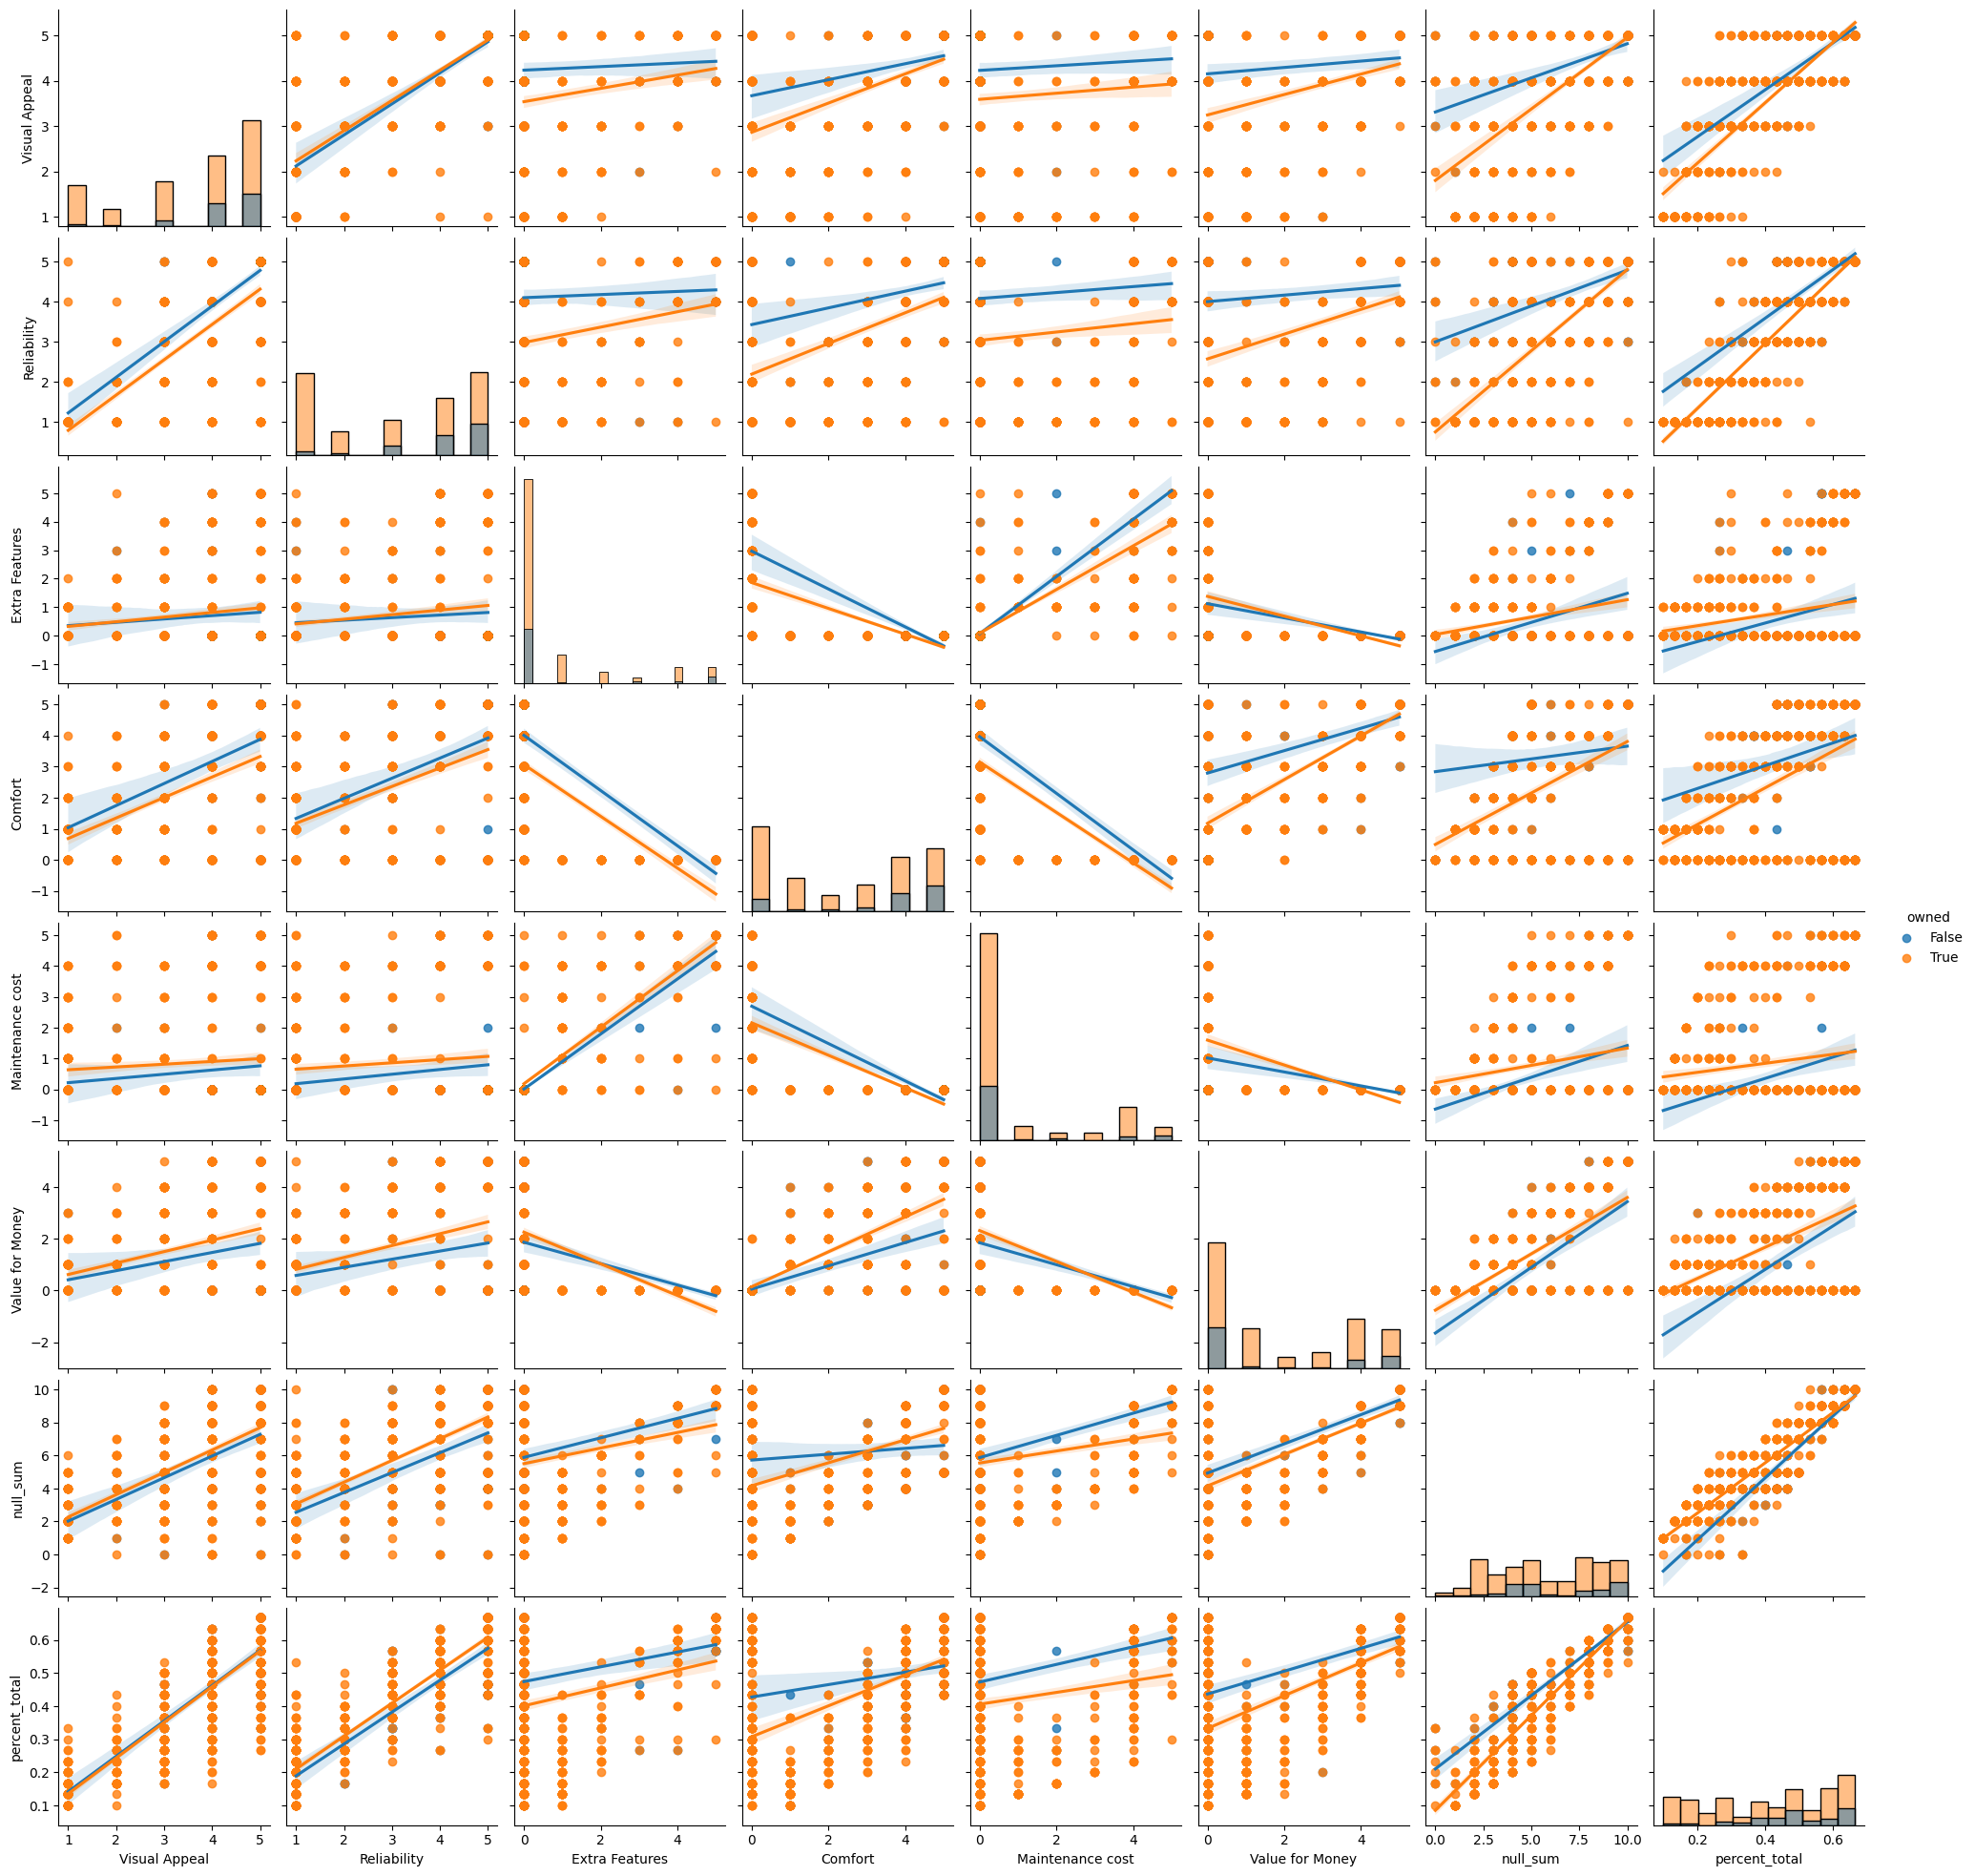

<Figure size 640x480 with 0 Axes>

In [6]:
sns.pairplot(data=moped, kind="reg", diag_kind="hist", hue="owned")
plt.show()
#plt.savefig("bigpairplot.png", bbox_inches="tight")
plt.clf()

In [7]:
plt.hist(moped["percent_total"])
plt.title("Histogram of Total Score %")
#plt.show()
plt.savefig("score_pct_hist.png", bbox_inches="tight")
plt.clf()
plt.hist(moped["Reliability"], bins=5)
plt.title("Histogram of Reliability Scores")
plt.xticks([1,2,3,4,5])
#plt.show()
plt.savefig("score_hist.png", bbox_inches="tight")
plt.clf()

<Figure size 640x480 with 0 Axes>

In [8]:
# group moped by owned
moped_by_owned = moped.groupby("owned").mean()
# temporarily replace the filled 0's with nan to calculate accurate means
mopedna = moped.replace(0,np.nan)
display(mopedna.isna().sum())
mopedna_by_owned = mopedna.groupby("owned").mean()
display("fill 0 means: ", moped_by_owned)
display("with na means:", mopedna_by_owned)
# it looks like in both cases non-owners gave higher ratings than owners
# Possibly fill na with means?

Used it for           0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
null_sum             12
percent_total         0
owned                 0
dtype: int64

'fill 0 means: '

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total
owned,,,,,,,,
False,4.266667,4.125926,0.733333,3.355556,0.666667,1.562963,6.318519,0.490370
True,3.652249,3.124567,0.756055,2.437716,0.877163,1.792388,5.863322,0.421338


'with na means:'

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total
owned,,,,,,,,
False,4.266667,4.125926,4.125000,4.194444,3.913043,4.2200,6.462121,0.490370
True,3.652249,3.124567,2.748428,3.504975,3.313725,3.2375,5.956063,0.421338


In [9]:
# Check if used it for has an effect
moped_by_use = moped.groupby("Used it for").mean()
mopedna_by_use = mopedna.groupby("Used it for").mean()
display("fill 0 means: ", moped_by_use)
display("with na means:", mopedna_by_use)

'fill 0 means: '

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
Used it for,,,,,,,,,
Commuting,3.687161,3.159132,0.748644,2.473779,0.873418,1.725136,5.820976,0.422242,0.853526
Leisure,4.050000,3.850000,0.762500,3.087500,0.712500,1.831250,6.393750,0.476458,0.662500


'with na means:'

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
Used it for,,,,,,,,,
Commuting,3.687161,3.159132,2.875000,3.489796,3.425532,3.201342,5.928177,0.422242,0.853526
Leisure,4.050000,3.850000,3.128205,4.186441,3.257143,4.069444,6.474684,0.476458,0.662500


In [10]:
# Commuters give mostly lower average scores in both cases
# approx 15% commuter reviews were non-owners while 34% of leisure were non-owners
# this may be of interest in modeling, change from object to integer: leisure = 1, commuting = 0
use_dict = {"Commuting":0, "Leisure":1}
moped["Used it for"].replace(use_dict, inplace=True)
mopedna["Used it for"].replace(use_dict, inplace=True)
display(moped.head())

,Used it for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
0,0,TVS iQube,3.0,4.0,0.0,4.0,0.0,1.0,5.0,0.400000,False
1,1,TVS iQube,3.0,1.0,0.0,3.0,0.0,3.0,6.0,0.333333,True
2,0,TVS iQube,4.0,4.0,0.0,5.0,0.0,2.0,7.0,0.500000,True
3,0,TVS iQube,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.133333,True
4,0,TVS iQube,3.0,4.0,0.0,3.0,0.0,2.0,5.0,0.400000,True


In [11]:
# checking last object, model name
moped_by_model = moped.groupby("Model Name").mean()
mopedna_by_model = mopedna.groupby("Model Name").mean()
display(moped["Model Name"].value_counts().sort_index())
display("fill 0 means: ", moped_by_model)
display("with na means:", mopedna_by_model)

Ampere Magnus EX           25
Ampere Magnus Pro          16
Ampere REO                 21
Ampere Zeal                 9
Ather 450X                 26
BGauss B8                   1
Bajaj Chetak               13
Benling Aura               19
Bounce Infinity E1         10
Evolet Polo                 2
Gemopai Astrid Lite         3
Gemopai Ryder               5
Hero Electric Atria         3
Hero Electric Flash        94
Hero Electric NYX           8
Hero Electric Optima       75
Hero Electric Optima CX     9
Hero Electric Photon       34
Joy e-bike Monster          2
Joy e-bike Wolf             5
OLA S1                     18
OLA S1 Pro                 25
Odysse Evoqis               3
Okinawa Lite                6
Okinawa Praise             73
Okinawa R30                 6
Okinawa Ridge Plus         12
Okinawa i-Praise           11
PURE EV EPluto 7G          40
PURE EV ETrance Neo        16
Revolt RV 300               6
Revolt RV 400              44
TVS iQube                  17
Techo Elec

'fill 0 means: '

,Used it for,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
Model Name,,,,,,,,,,
Ampere Magnus EX,0.080000,4.160000,3.760000,2.880000,0.200000,2.920000,0.200000,6.200000,0.470667,0.920000
Ampere Magnus Pro,0.187500,3.312500,3.437500,2.750000,0.250000,3.125000,0.250000,6.375000,0.437500,0.937500
Ampere REO,0.095238,3.190476,2.761905,0.047619,2.904762,0.047619,2.761905,5.761905,0.390476,0.952381
Ampere Zeal,0.222222,3.777778,2.888889,1.555556,1.111111,1.777778,1.222222,5.666667,0.411111,1.000000
Ather 450X,0.192308,4.076923,3.923077,0.230769,3.538462,0.269231,0.000000,4.038462,0.401282,0.884615
BGauss B8,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,0.166667,1.000000
Bajaj Chetak,0.384615,4.538462,4.307692,0.692308,3.538462,0.692308,1.846154,6.769231,0.520513,0.692308
Benling Aura,0.210526,3.631579,2.947368,2.263158,0.210526,2.631579,0.157895,5.263158,0.394737,0.894737
Bounce Infinity E1,0.200000,3.200000,2.600000,0.000000,3.100000,0.000000,2.900000,6.000000,0.393333,0.800000


'with na means:'

,Used it for,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
Model Name,,,,,,,,,,
Ampere Magnus EX,0.080000,4.160000,3.760000,3.600000,5.000000,4.055556,5.000000,7.045455,0.470667,0.920000
Ampere Magnus Pro,0.187500,3.312500,3.437500,2.933333,4.000000,3.571429,4.000000,6.375000,0.437500,0.937500
Ampere REO,0.095238,3.190476,2.761905,1.000000,3.050000,1.000000,3.052632,5.761905,0.390476,0.952381
Ampere Zeal,0.222222,3.777778,2.888889,2.800000,2.500000,3.200000,2.750000,5.666667,0.411111,1.000000
Ather 450X,0.192308,4.076923,3.923077,3.000000,3.833333,3.500000,NaN,4.038462,0.401282,0.884615
BGauss B8,0.000000,1.000000,1.000000,1.000000,NaN,2.000000,NaN,3.000000,0.166667,1.000000
Bajaj Chetak,0.384615,4.538462,4.307692,4.500000,4.181818,4.500000,4.800000,6.769231,0.520513,0.692308
Benling Aura,0.210526,3.631579,2.947368,2.687500,2.000000,3.125000,1.500000,5.555556,0.394737,0.894737
Bounce Infinity E1,0.200000,3.200000,2.600000,NaN,3.100000,NaN,2.900000,6.000000,0.393333,0.800000


In [12]:
moped_by_model.plot(y="owned", title="% Ownership by % Moped Model")
plt.scatter(x=np.sort(moped["Model Name"].unique()), y=moped["Model Name"].value_counts().sort_index()/len(moped), color='r')
plt.ylabel("Percent")
plt.xticks([])
#plt.show()
plt.savefig("pct_ownership_by_model.png", bbox_inches="tight")
plt.clf()

<Figure size 640x480 with 0 Axes>

In [13]:
# Nothing of interest from grouping by model name, remove from df
moped.drop("Model Name", axis=1, inplace=True)
mopedna.drop("Model Name", axis=1, inplace=True)

In [14]:
# look for linear correlation
display(moped.corr())
display(mopedna.corr())
sns.heatmap(mopedna.corr(), annot=True)
plt.title("Heatmap of Correlations")
#plt.show()
plt.savefig("corr_heatmap.png", bbox_inches="tight")
plt.clf()
# possibly three types of reviews sent out based on null values:
# 1 has all scores, 1 does not have extra features/maintenance cost, 1 does not have comfort/value for money?

,Used it for,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
Used it for,1.000000,0.111386,0.182026,0.003794,0.126101,-0.041530,0.022019,0.082085,0.129697,-0.203416
Visual Appeal,0.111386,1.000000,0.776160,0.136179,0.461473,0.067773,0.275947,0.621356,0.840391,-0.177128
Reliability,0.182026,0.776160,1.000000,0.149766,0.481192,0.087367,0.317751,0.681972,0.883721,-0.247763
Extra Features,0.003794,0.136179,0.149766,1.000000,-0.634629,0.857739,-0.429223,0.260589,0.225696,0.005843
Comfort,0.126101,0.461473,0.481192,-0.634629,1.000000,-0.666216,0.613437,0.419053,0.498670,-0.177102
Maintenance cost,-0.041530,0.067773,0.087367,0.857739,-0.666216,1.000000,-0.450587,0.228345,0.171101,0.051016
Value for Money,0.022019,0.275947,0.317751,-0.429223,0.613437,-0.450587,1.000000,0.643652,0.525984,0.044707
null_sum,0.082085,0.621356,0.681972,0.260589,0.419053,0.228345,0.643652,1.000000,0.924214,-0.061262
percent_total,0.129697,0.840391,0.883721,0.225696,0.498670,0.171101,0.525984,0.924214,1.000000,-0.155082
owned,-0.203416,-0.177128,-0.247763,0.005843,-0.177102,0.051016,0.044707,-0.061262,-0.155082,1.000000


,Used it for,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,null_sum,percent_total,owned
Used it for,1.000000,0.111386,0.182026,0.063492,0.209397,-0.048504,0.225386,0.080719,0.129697,-0.203416
Visual Appeal,0.111386,1.000000,0.776160,0.747856,0.791839,0.617862,0.739694,0.651068,0.840391,-0.177128
Reliability,0.182026,0.776160,1.000000,0.823643,0.811170,0.708368,0.824050,0.709527,0.883721,-0.247763
Extra Features,0.063492,0.747856,0.823643,1.000000,NaN,0.623091,NaN,0.886946,0.896895,-0.284534
Comfort,0.209397,0.791839,0.811170,NaN,1.000000,NaN,0.779055,0.748938,0.869523,-0.200778
Maintenance cost,-0.048504,0.617862,0.708368,0.623091,NaN,1.000000,NaN,0.861161,0.811938,-0.145776
Value for Money,0.225386,0.739694,0.824050,NaN,0.779055,NaN,1.000000,0.945573,0.914394,-0.220279
null_sum,0.080719,0.651068,0.709527,0.886946,0.748938,0.861161,0.945573,1.000000,0.929621,-0.069935
percent_total,0.129697,0.840391,0.883721,0.896895,0.869523,0.811938,0.914394,0.929621,1.000000,-0.155082
owned,-0.203416,-0.177128,-0.247763,-0.284534,-0.200778,-0.145776,-0.220279,-0.069935,-0.155082,1.000000


<Figure size 640x480 with 0 Axes>

In [15]:
# look to see if there are three types of reviews sent out, may adjust df accordingly
test = mopedna.loc[:,"Visual Appeal":"Value for Money"]
test.iloc[0,2] >0
type1 = test.dropna(subset=["Extra Features", "Maintenance cost"], how="all")
type2 = test.dropna(subset=["Comfort", "Value for Money"], how="all")
type0 = test.drop(labels=type1.index).drop(labels=type2.index)
display("Missing all: {}".format(type0.shape), "Missing Features + Maintenance:  {}".format(type1.shape),\
        "Missing Comfort + Value: {}".format(type2.shape))
display(type0.isnull().sum())

'Missing all: (12, 6)'

'Missing Features + Maintenance:  (189, 6)'

'Missing Comfort + Value: (512, 6)'

Visual Appeal        0
Reliability          0
Extra Features      12
Comfort             12
Maintenance cost    12
Value for Money     12
dtype: int64

In [16]:
# only 12 are missing all, doubtful that only 12/730 people were given a different form
# Strong evidence for two different forms, each with possible total of 20 points, adjust percent total in df's
# Assuming different forms, null_sum is no longer useful
moped.percent_total = moped.percent_total*30/20
mopedna.percent_total = mopedna.percent_total*30/20
moped.drop("null_sum", axis=1, inplace=True)
mopedna.drop("null_sum", axis=1, inplace=True)

In [17]:
#update grouped dfs
moped_by_owned = moped.groupby("owned").mean()
mopedna_by_owned = mopedna.groupby("owned").mean()
moped_by_use = moped.groupby("Used it for").mean()
mopedna_by_use = mopedna.groupby("Used it for").mean()

In [19]:
# ownership has a weak linear correlation with each of the values
# plot avg rating vs ownership
moped_by_owned.loc[:,"percent_total"].plot(kind="bar", title="Average Percentage of Ratings by Ownership", ylabel="Percent of possible rating (out of 30)")
#plt.show()
plt.savefig("avg_ratings.png", bbox_inches="tight")
plt.clf()
# broken down into each of the rating categories
mopedna_by_owned.loc[:,~mopedna_by_owned.columns.isin(["Used it for","percent_total"])].plot(kind="bar", title="Average Rating (1-5) by Ownership", ylabel="Rating")
plt.legend(bbox_to_anchor=(1.4,.825), loc="right")
plt.yticks(np.arange(0,5.5,.5))
#plt.show()
plt.savefig("avg_rating_numeric.png", bbox_inches="tight")
plt.clf()
sns.boxplot(x=mopedna.owned, y=mopedna.percent_total)
plt.title("Boxplot of Percent Score by Ownership")
plt.ylabel("Percentage")
#plt.show()
plt.savefig("boxplot_pct_score_by_ownership.png", bbox_inches="tight")
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
# look at same info grouped by use type
moped_by_use.plot(kind="bar", title="Values Based on Usage Type")
plt.legend(bbox_to_anchor=(1.4,.73), loc="right")
plt.xticks(ticks=[0,1], labels=["Commute", "Leisure"], rotation=0)
#plt.show()
plt.savefig("values_by_usage.png", bbox_inches="tight")
plt.clf()
# almost all commuters owned, significant portion of leisure not owned
# leisure rated noticeably higher on all features except maintenance cost


<Figure size 640x480 with 0 Axes>

In [21]:
# Changing owned col to int to prep for model
moped.owned = moped.owned.astype(int)
mopedna.owned = mopedna.owned.astype(int)
display(mopedna.head())
# seperate data based on questionnaire type (0 or 1)
qtype = mopedna["Extra Features"].isna()


,Used it for,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,percent_total,owned
0,0,3.0,4.0,NaN,4.0,NaN,1.0,0.60,0
1,1,3.0,1.0,NaN,3.0,NaN,3.0,0.50,1
2,0,4.0,4.0,NaN,5.0,NaN,2.0,0.75,1
3,0,1.0,1.0,NaN,1.0,NaN,1.0,0.20,1
4,0,3.0,4.0,NaN,3.0,NaN,2.0,0.60,1


In [22]:
moped.insert(1, "Questionnaire", qtype.astype(int))

In [23]:
# get int values of mean by ownership
grouping = mopedna.groupby("owned")
false_index = moped[moped.owned == 0]
true_index = moped[moped.owned == 1]
display(np.round(grouping["Extra Features"].mean(),0))
display(np.round(grouping["Comfort"].mean()))
display(np.round(grouping["Maintenance cost"].mean()))
display(np.round(grouping["Value for Money"].mean()))
value_dict = {"Extra Features":[4,3], "Comfort":[4,4], "Maintenance cost":[4,3], "Value for Money":[4,3]}
# replace 0 with mean by ownership in specified cols
for i in range(len(moped)):
    for col in value_dict.keys():
        if moped["owned"][i] == 0:
            if moped[col][i] == 0:
                moped[col][i] = value_dict[col][0]
        else:
            if moped[col][i] == 0:
                moped[col][i] = value_dict[col][1]

display(moped.head())

owned
0    4.0
1    3.0
Name: Extra Features, dtype: float64

owned
0    4.0
1    4.0
Name: Comfort, dtype: float64

owned
0    4.0
1    3.0
Name: Maintenance cost, dtype: float64

owned
0    4.0
1    3.0
Name: Value for Money, dtype: float64

,Used it for,Questionnaire,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,percent_total,owned
0,0,1,3.0,4.0,4.0,4.0,4.0,1.0,0.60,0
1,1,1,3.0,1.0,3.0,3.0,3.0,3.0,0.50,1
2,0,1,4.0,4.0,3.0,5.0,3.0,2.0,0.75,1
3,0,1,1.0,1.0,3.0,1.0,3.0,1.0,0.20,1
4,0,1,3.0,4.0,3.0,3.0,3.0,2.0,0.60,1


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of single variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*
## Preliminary Findings

A sample overview of the data is given in the histograms ***Histogram of Total Score %*** and ***Histogrm of Reliability Scores***. Here we see that most of the reviews were at one extreme or the other (given a rating of 1, 4, or 5). This may hold for each of the other features, seeing as the percent total is mostly under 50%. It is of interest to look at how ownership affects these scores.

The data showed a mostly positive correlation between most ratings, for example, a higher score on Reliability generally indicated a higher score on Visual Appeal. Interestingly, in almost all cases, the ratings by non-owners were higher on average than those by owners. After this finding, the data was grouped by each of the "owned", "Used it for", and "Model Name" columns to look for further correlations. In the figure ***% Ownership by % Model***, the ownership percentage by model was viewed as a blue line against the percentage of each type of model found in the data (red dots). Strong dips in ownership percentage did not correspond to surges or dips in the percentage of model, so this data was found to have no strong impact. That is, the review of an Ampere Magnus EX was about as likely to be from an actual owner as a review for a Hero Electric Optima. The **"Model Name" column was dropped** from the dataframe.

Further inspection on the data grouped by owners and by usage type was found to be more interesting and will be used in constructing a model.

## Closer Inspection

Looking at the figure ***Heatmap of Correlations***, there are three findings to take note of. Note values listed are between -1 and 1, and values closer to either extreme indicate a stronger linear relationship.

1. The positive correlation between review question responses was found to hold in general, which can be expected.
2. Ownership appears to only have weak linear correlation with each of the responses, which we will look at further.
3. The blank squares indicate missing values, so it would seem that respondants may have received different questionnaires.

On the third point, the data was split into three tables, one where the "Extra Features" and "Maintenance cost" columns both had missing values, one where "Comfort" and "Value for Money" columns both had missing values, and a third that consisted of the remaining rows not caught by the first two. This split the data into 189, 512, and 12 entries, respectively. Since all four of the mentioned columns were empty in the third dataframe, and given the low number of such entries, it was found most likely that these respondants just did not provide an answer for these values. However, given the large number of mutually exclusive entries in the first two tables, it would be safe to assume that **respondants were given one of two different questionnaires**. This changed the total possible points of a review from 30 to 20, and **updates to the "percent_total" column were made**, increasing most of these percentages.

Looking at the figure ***Average Percantage of Ratings by Ownership***, it is shown that on average, **non-owners gave better scoring responses than owners**. Further, in ***Average Rating (1-5) by Ownership***, we see that not only is this true overall, but for each individual rated response. Finally, the plot ***Boxplot of Percent Score by Ownership*** also shows that the responses from non-owners are more closely grouped at a higher rating than owners, even making the lowest scored responses outliers. This may be surprising at first, given the tendency of people to sandbag products based on things such as personal belief (i.e. a climate activist would likely respond much worse to a new car with high emissions and low mpg than your average client). However, all other things being equal, one possible reason for this difference is the simple fact that the non-owners do not have to perform upkeep, maintenance, etc. on the vehicle. A homeowner would likely scrutinize a plumbing company much closer than a renter for the simple reason that the renter relies on their landlord to cover the expenses; similarly, a moped owner seems to be more likely to rate lower based on everyday use and maintenance than a person who either borrows one or simply sees them on the street.

The last grouping examined was the data by usage type, Commuting or Leisure, in the figure ***Values Based on Usage Type***. Regarding the individual questions, we see a clear difference in "Visual Appeal", "Reliability", and "Comfort" between the two, with Leisure drivers rating higher on average. Perhaps they purchased nicer models, but since the model did not have much impact on ownership, this was not explored. More to the point of the purpose of this analysis, we see that **Commuter reviews were much more likely to be from owners**, with commuter reviews having an ownership percentge around 85%, and leisure reviews being around 66%.

## Changes to Data

Since we will be working under the assumption that two different question sets were given to reviewers, the null_sum column no longer provided useful information, and was dropped. Further, the percent totals were updated to be out of 20 points instead of 30. As stated before, the column containing the models of mopeds was dropped, as it did not have a significant impact. To prepare the data for modeling, the "Used it for" column was changed to have a 0 representing Commute and 1 representing Leisure, and the "owned" column was changed from True and False to 1 and 0. Further, since there were two different question sets, the column "Questionnaire" has been added, which implicitly encodes which of the two columns were null, keeping information loss to a minimum as we **replace 0's with the rounded mean by ownership** in each of these columns.

In [24]:
X = moped.iloc[:,:-1]
y = moped.iloc[:,-1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, stratify=y, random_state=271828)
lr = LogisticRegression(random_state=271828)
forest = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=271828)
lr.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=271828)

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*Write your description here*
## Model
The question posed is to predict if a review came from a non-owner. Since the data given provides whether or not the moped was owned (the output we are looking for), we are looking at a **supervised machine learning** problem. The problem is a boolean (True or False) question, so the baseline model chosen is a **logistic regression** model. This model is used in contexts such as determining whether a tumor is malignant or benign based on some data, so it seems like a good place to start. As a comparison model, a **random forest** will be used. A single tree may have worked as well, in which the model looks at information, poses a condition, and moves forward based on whether the data satisfied the condition or not until it reaches a conclusion; much like a flowchart! The random forest will do this, but with many trees.

In [25]:
y_pred_lr = lr.predict(X_test)
y_pred_forest = forest.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_f = confusion_matrix(y_test, y_pred_forest)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix with Logistic Regression:")
#plt.show()
plt.savefig("lr_conf_mat.png", bbox_inches="tight")
plt.clf()

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_f, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix with Random Forest:")
#plt.show()
plt.savefig("rf_conf_matrix.png", bbox_inches="tight")
plt.clf()

display("Logistic PRFS:", precision_recall_fscore_support(y_test, y_pred_lr))
display("Forest PRFS:", precision_recall_fscore_support(y_test, y_pred_forest))

'Logistic PRFS:'

(array([0.97222222, 0.96629213]),
 array([0.85365854, 0.99421965]),
 array([0.90909091, 0.98005698]),
 array([ 41, 173]))

'Forest PRFS:'

(array([1.        , 0.99425287]),
 array([0.97560976, 1.        ]),
 array([0.98765432, 0.99711816]),
 array([ 41, 173]))

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*Write your description here*
## Confusion Matrix

To break down the confusion matrices, first note that true and false in this case correspond to whether a review was written by an owner (true) or non-owner (false). The first box is the number of entries where the model predicted false and the actual value was false. To the right we have predicted true, actually false; below this is predicted and actually true; and the bottom left is predicted false but is true. In that order we call these True Negative, False Positive, True Positive, and False Negative. Based on the two confusion matrices, we see that both models performed pretty well.

## Metrics

We are looking to predict if a review has been written by a non-owner, so we would like to maximize True Negatives and minimize False Positives. Thus we are looking at the **recall** of the models. The specific value in this case is given by $\frac{\text{True Negatives}}{\text{True Negatives + False Positives}}$. This was computed to be $85.36\%$ for the Logistic Regression model and $97.56\%$ for the Random Forest model. This means that in the Random Forest model, we expect to correctly identify a non-owner $97.56\%$ of the time. Of course, we should not shirk the precision of a model either, and here we see precision scores of $96.7\%$ and $99.5\%$ for the models, respectively. This is simply a proportion of how many items the models predicted correctly. In both regards, the Random Forest model has outperformed the Logistic Regression model.

## Conclusion

Given the relative performances of the model, we can predict which reviews are coming from non-owners, and assuming the data provided matches the data that EMO will be receiving, it is recommended that we use the Random Forest to do so in our own business.